In [1]:
import numpy as np 
import scipy as scp
import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib as mpl

params = {'image.aspect':'equal',
          'savefig.dpi':600,
          'axes.grid':True,
          'axes.grid.which':"both",
          'font.size':12,
          'text.usetex':True,
          'text.color':'black',
          'image.cmap':'viridis'}

mpl.rcParams.update(params)

In [2]:
V_core = 30.4
r_elec = .3175 * 1e-2
h_elec = 182.88 * 1e-2
time = 42.67708325
S_elec, V_elec = r_elec * 2 * np.pi * h_elec, np.pi * r_elec**2 * h_elec
S_per_h = S_elec / h_elec
V_per_h = V_elec / h_elec
num_per_m2 = 100*100

In [3]:
V_per_h * num_per_m2

0.3166921744359361

In [4]:
D_pipe = 40.64e-2
A_pipe = D_pipe **2 * np.pi / 4
A_pipe_tot = A_pipe

pump_cap = 1.01
v_pipe = pump_cap / A_pipe

In [5]:
Volume = v_pipe * A_pipe_tot * time
A_td = Volume / 1.5

In [6]:
w_channel = 40.64e-2
num_channels = 5
w = w_channel * num_channels
l_channel = A_td / w
w

2.032

In [7]:
num_elec_w = int(w_channel*100)
num_elec_channel = int(l_channel*100) *(2* num_elec_w -1 ) /2

In [8]:
cost_elec = 152
num_electrodes = 4* num_channels * num_elec_channel
cost_elec * num_electrodes

169793120.0

# Redo time
ignore everything above, don't want to delete just in case

In [31]:
num_elec_per_m = 12

# area of inlet pipe and fixed channel depth

inlet_pipe_area = D_pipe **2 / 4 * np.pi
channel_depth = 1.5 # electrode height is 1.82 meters, want some extra height for channel blockage

# finding the width of the channel, setting the flow area of each channel to be equal to the inlet pipe area
MULTI = 7.5
eff_width = lambda x: x - np.floor(x*num_elec_per_m)*r_elec*2  # x is the channel width, - chunk is the total width of electrodes impeding flow
find_width = lambda x: MULTI*inlet_pipe_area - channel_depth * eff_width(x) # root find to find x lol
channel_width = scp.optimize.root(find_width, [.4]).x[0] # find x
eff_channel_width = eff_width(channel_width) #plug in x to get eff width
eff_channel_area = eff_channel_width * channel_depth # should be inlet pipe diameter

#finding the inlet velocity
pump_capacity = 1.01 #m3/s
inlet_pipe_vel = pump_capacity / inlet_pipe_area
number_channels = 5
# m3/s = m/s * m2 -> Q = vA. Yes i know this just goes to pump capacity
channel_velocity = inlet_pipe_vel * inlet_pipe_area / (number_channels * eff_channel_area)
time = 42.67708325
channel_length = time * channel_velocity

#num in width x num in length
num_elec_per_channel = np.floor(channel_width * num_elec_per_m) * np.floor(channel_length * num_elec_per_m)

#cost
cost_elec = 152
total_num_electrodes = num_elec_per_channel*number_channels
total_elec_cost = cost_elec *  total_num_electrodes * 1e-6

In [32]:
channel_length, channel_width*number_channels, eff_channel_width, num_elec_per_channel*number_channels

(np.float64(8.861098336771304),
 np.float64(3.496927866223985),
 np.float64(0.648585573244797),
 np.float64(4240.0))

In [33]:
channel_length * eff_channel_width * number_channels * channel_depth

np.float64(43.10385408250001)

In [34]:
channel_length * channel_width * number_channels * channel_depth

np.float64(46.47993254880987)

In [35]:
channel_length * channel_width

np.float64(6.197324339841316)

In [36]:
D = 1.28e-6*1e-4
correlation_visc = lambda T: 1.16e-4 * np.exp(3755/T)
rho = np.array([3283.9, 3330.4, 3376.9])[::-1]
temps = np.array([978, 908, 839])[::-1]-273.15
mu = np.array([correlation_visc(temp) for temp in temps])
kinematic_visc = mu / rho

In [37]:
hydraulic_diameter = 2 * eff_channel_area / (eff_channel_width  + channel_depth)
rho[0] * channel_velocity * hydraulic_diameter / mu[0]

np.float64(7182.834320170605)

In [16]:
r_elec *1e2

0.3175

In [17]:
time * inlet_pipe_vel

332.2911876289239

In [18]:
kinematic_visc / D

array([204513.92846319, 100811.3077998 ,  56820.81986268])

np.float64(11.580775911986104)

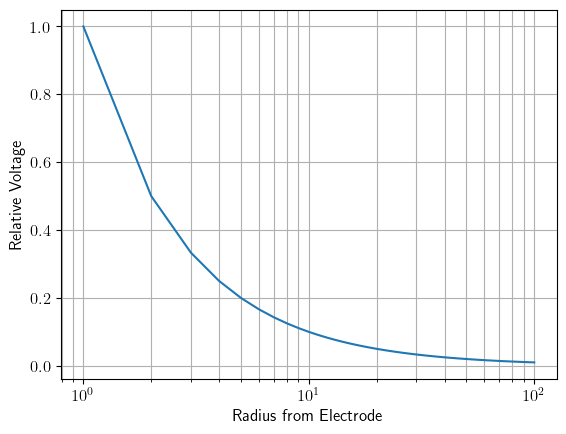

In [29]:
resistivity = 1.397
voltage_drop = lambda r: resistivity * r / (np.pi * r**2)
rs = np.linspace(0.01,1, 100)
values = voltage_drop(rs)
values /= values[0]
plt.semilogx(rs*100, values)
plt.ylabel('Relative Voltage')
plt.xlabel('Radius from Electrode')
plt.savefig('voltage.png',dpi=600)
func = scp.interpolate.interp1d(values, rs)
1 / (2 * (func(.25) + r_elec))

In [39]:
current = 0.12
voltage = 2.045 + 1.2
power = current * voltage
num_elec_per_channel*number_channels * power 

np.float64(1651.056)